**Jiahao (Derek) Ye**

Spring 2020

CS 251: Data Analysis and Visualization

Project 6: Supervised learning

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Task 3: Naive Bayes Classifier

After finishing your email preprocessing pipeline, implement the one other supervised learning algorithm we we will use to classify email, **Naive Bayes**.

### 3a) Implement Naive Bayes

In `naive_bayes.py`, implement the following methods:
- Constructor
- `train(data, y)`: Train the Naive Bayes classifier so that it records the "statistics" of the training set: class priors (i.e. how likely an email is in the training set to be spam or ham?) and the class likelihoods (the probability of a word appearing in each class — spam or ham).
- `predict(data)`: Combine the class likelihoods and priors to compute the posterior distribution. The predicted class for a test sample is the class that yields the highest posterior probability.
- `accuracy(y, y_pred)`: The usual definition :)


#### Bayes rule ingredients: Priors and likelihood (`train`)

To compute class predictions (probability that a test example belong to either spam or ham classes), we need to evaluate **Bayes Rule**. This means computing the priors and likelihoods based on the training data.

**Prior:** $$P_c = \frac{N_c}{N}$$ where $P_c$ is the prior for class $c$ (spam or ham), $N_c$ is the number of training samples that belong to class $c$ and $N$ is the total number of training samples.

**Likelihood:** $$L_{c,w} = \frac{N_{c,w} + 1}{N_{c} + M}$$ where
- $L_{c,w}$ is the likelihood that word $w$ belongs to class $c$ (*i.e. what we are solving for*)
- $N_{c,w}$ is the total count of **word $w$** in emails that are only in class $c$ (*either spam or ham*)
- $N_{c}$ is the total number of **all words** that appear in emails of the class $c$ (*total number of words in all spam emails or total number of words in all ham emails*)
- $M$ is the number of features (*number of top words*).

#### Bayes rule ingredients: Posterior (`predict`)

To make predictions, we now combine the prior and likelihood to get the posterior:

**Posterior:** $$\text{Post}_{i, c} = Log(P_c) + \sum_{j \in J_i}Log(L_{c,j})$$ where
- $\text{Post}_c$ is the posterior for class $c$ for test sample $i$(*i.e. evidence that email $i$ is spam or ham*). What we are solving for.
- $Log(P_c)$ is the logarithm of the prior for class $c$ $P_c$.
- $j \in J_i$ (under the sum) indexes the set of words in the current test sample that have nonzero counts (*i.e. which words show up in the current test set email $i$? $j$ is the index of each of these words.*)
- $\sum_{j \in J_i}Log(L_{c,j})$: we sum over the log-likelihoods ONLY PERTAINING TO CLASS $c$ at word word indices that appear in the current test email $i$ (i.e. indices at which the counts are > 0).

In [2]:
from naive_bayes_multinomial import NaiveBayes

#### Test `train`

In [3]:
num_test_classes = 4
np.random.seed(0)
data_test = np.random.random(size=(100, 6))
y_test = np.random.randint(low=0, high=num_test_classes, size=(100,))

nbc = NaiveBayes(num_classes=num_test_classes)
nbc.train(data_test, y_test)

print(f'Your class priors are: {nbc.class_priors}\nand should be          [0.24 0.26 0.25 0.25].')
print(f'Your class likelihoods shape is {nbc.class_likelihoods.shape} and should be (4, 6).')
print(f'Your likelihoods are:\n{nbc.class_likelihoods}')


test_likelihoods = np.array([[0.15116, 0.18497, 0.17571, 0.1463 , 0.16813, 0.17374],
       [0.16695, 0.17437, 0.15742, 0.16887, 0.15677, 0.17562],
       [0.14116, 0.1562 , 0.19651, 0.17046, 0.17951, 0.15617],
       [0.18677, 0.18231, 0.15884, 0.12265, 0.16755, 0.18187]])
print(f'and should be\n{test_likelihoods}')

Your class priors are: [0.24 0.26 0.25 0.25]
and should be          [0.24 0.26 0.25 0.25].
Your class likelihoods shape is (4, 6) and should be (4, 6).
Your likelihoods are:
[[0.15116 0.18497 0.17571 0.1463  0.16813 0.17374]
 [0.16695 0.17437 0.15742 0.16887 0.15677 0.17562]
 [0.14116 0.1562  0.19651 0.17046 0.17951 0.15617]
 [0.18677 0.18231 0.15884 0.12265 0.16755 0.18187]]
and should be
[[0.15116 0.18497 0.17571 0.1463  0.16813 0.17374]
 [0.16695 0.17437 0.15742 0.16887 0.15677 0.17562]
 [0.14116 0.1562  0.19651 0.17046 0.17951 0.15617]
 [0.18677 0.18231 0.15884 0.12265 0.16755 0.18187]]


#### Test `predict`

In [4]:
num_test_classes = 4
np.random.seed(0)
data_train = np.random.random(size=(100, 10))
data_test = np.random.random(size=(4, 10))
y_test = np.random.randint(low=0, high=num_test_classes, size=(100,))

nbc = NaiveBayes(num_classes=num_test_classes)
nbc.train(data_train, y_test)
test_y_pred = nbc.predict(data_test)

print(f'Your predicted classes are {test_y_pred} and should be [2 2 2 2].')

Your predicted classes are [2 2 2 2] and should be [2 2 2 2].


### 3c) Spam filtering

Let's start classifying spam email using the Naive Bayes classifier.

- Use `np.load` to load in the train/test split that you created last week.
- Use your Naive Bayes classifier on the Enron email dataset!

**Question 9:** What accuracy do you get on the test set with Naive Bayes?

- Accuracy: 89%

In [94]:
import email_preprocessor as ep

In [95]:
# Load your training and test data into numpy ndarrays using np.load()
# (the files you created at the end of the previous notebook)
train_x = np.load('data/email_train_x.npy')
train_y = np.load('data/email_train_y.npy')
train_inds = np.load('data/email_train_inds.npy')
test_x = np.load('data/email_test_x.npy')
test_y = np.load('data/email_test_y.npy')
test_inds = np.load('data/email_test_inds.npy')

In [96]:
# Construct your classifier
nbc = NaiveBayes(num_classes=num_test_classes)

In [98]:
# Train and test your classifier
nbc.train(train_x, train_y)
test_y_pred = nbc.predict(test_x)
print(nbc.accuracy(test_y, test_y_pred))

0.8902077151335311


### 3d) Confusion matrix

To get a better sense of the errors that the Naive Bayes classifer makes, you will create a confusion matrix. 

- Implement `confusion_matrix` in `naive_bayes.py`.
- Print out a confusion matrix of the spam classification results.

In [113]:
print(nbc.confusion_matrix(test_y, test_y_pred))

[[3237.  175.]
 [ 565. 2763.]]


**Question 10:** Interpret the confusion matrix, using the convention that positive detection means spam (*e.g. a false positive means classifying a ham email as spam*). What types of errors are made more frequently by the classifier? What does this mean (*i.e. X (spam/ham) is more likely to be classified than Y (spam/ham) than the other way around*)?

**Reminder: Look back at your preprocessing code: which class indices correspond to spam/ham?**

**Answer 10:** 
- The upper-left number is the **True Positive** detections, i.e., number of correct spam detections. The upper-right number is **False Negative**, i.e., the numnber of samples that are classified as ham but are actually spam. The lower-left number is the **False Positive** detections, i.e., the number of emails classified as spam but are actually ham. The lower-right number is the **True Negative** detections, i.e., number of correct ham detections. 
- Hence, we may calculate that the rate of **FN** is 175/(175+3237)x100% = **5.1%**; and the rate of **FP** is 565/(565+2763)x100% = **17.0%**. 
- Since FP rate is bigger than FN rate, **more emails will be classified as spam than ham.**

### 3e) Investigate the misclassification errors

Numbers are nice, but they may not the best for developing your intuition. Sometimes, you want to see what an misclassification *actually* looks like to build your understanding as you look to improve your algorithm. Here, you will take a false positive and a false negative misclassification and retrieve the actual text of the email so see which emails produced the error.

- Determine the index of the **FIRST** false positive and false negative misclassification — i.e. 2 indices in total. Remember to use your inds array to figure out the index of the emails BEFORE shuffling happened.
- **Section B:** Implement the function `retrieve_emails` in `email_preprocessor.py` to return the string of the raw email at the error indices. (**Sections A/C** have been supplied with this function on Classroom.)
- Call your function to print out the two emails that produced misclassifications.

**Question 11:** What do you think it is about each email that resulted in it being misclassified?

**Answer 11:** The spam emails in the training dataset might have many **dates**/**numbers** included, making the algorithm think that a email containing many **date**/**numbers** information is likely to be a spam.

In [115]:
# Determine the indices of the 1st FP and FN.
# Note: spam = 0, ham = 1

fp = -1
fn = -1
for i in range (len(test_y_pred)):
    # FP
    if (test_y[i] == 1) and (test_y_pred[i] == 0):
        fp = test_inds[i]
        break
for i in range (len(test_y_pred)):
    # FN 
    if (test_y[i] == 0) and (test_y_pred[i] == 1):
        fn = test_inds[i]
        break
print(f'Idx of 1st FP is {fp}')
print(f'Idx of 1st FN is {fn}')

Idx of 1st FP is 24632
Idx of 1st FN is 8258


In [116]:
# Use retrieve_emails() to display the first FP and FN.
import email_preprocessor as epp
inds = np.array([fp, fn])
emails = epp.retrieve_emails(inds)

print()
print('The 1st email that is a false positive (classified as spam, but really not) is:')
print('------------------------------------------------------------------------------------------')
print(emails[0])
print('------------------------------------------------------------------------------------------')
print('The 1st email that is a false negative (classified as ham, but really spam) is:')
print('------------------------------------------------------------------------------------------')
print(emails[1])
print('------------------------------------------------------------------------------------------')


The 1st email that is a false positive (classified as spam, but really not) is:
------------------------------------------------------------------------------------------
Subject: eastrans nomination effective 1 / 25 / 01
please increase deliveries into eastrans to 25 , 000 mmbtu / dy effective
9 / 25 / 01 and continue until further notified .
the redeliveries will be :
7300 mmbtu from fuels cotton valley
17 , 700 mmbtu to pg & e
------------------------------------------------------------------------------------------
The 1st email that is a false negative (classified as ham, but really spam) is:
------------------------------------------------------------------------------------------
Subject: perfect present for your loved one . our watch gallery has the answer .
with the serialnumber and logo , our collections look extra real than michael
jackson ¡ ¯ s nose .
prefer battery & quartz , winding she had a pug dog with her , and came , she said , to dispose of shares
in her tan - yard

## Task 4) Comparison with KNN


- Run a similar analysis to what you did with Naive Bayes above. When computing accuracy on the test set, you may want to reduce the size of the test set (e.g. to the first 500 emails in the test set).
- Copy-paste your `confusion_matrix` method into `knn.py` so that you can run the same analysis on a KNN classifier.

In [118]:
from knn import KNN

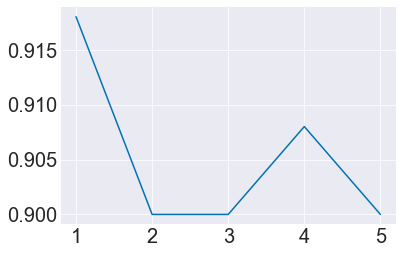

In [192]:
# Construct and train your KNN classifier
np.random.seed(0)
classifier = KNN(num_classes=2)
classifier.train(train_x, train_y)

def test(train, trainy, test, testy, iteration):
    classifier.train(train, trainy)
    acc = []
    ks = []
    k = 1
    for i in range(iteration):
        y_pred = classifier.predict(test, k)
        acc.append(classifier.accuracy(y=testy, y_pred=y_pred))
        ks.append(k)
        k += 1
    return ks, acc
        
x,y = test(train_x, train_y, test_x[:500], test_y[:500], 5)
plt.plot(x, y)
plt.show()

- According to the graph, I chose **k=1**

In [193]:
# Construct and train your KNN classifier
num_test = 500
classifier = KNN(num_classes=2)
classifier.train(train_x, train_y)
test_y_pred = classifier.predict(test_x[:num_test], 1)

In [194]:
# Evaluate the accuracy of the KNN classifier
acc = classifier.accuracy(test_y[:num_test], test_y_pred)
print(f'KNN accuracy: {acc * 100}%')

KNN accuracy: 91.8%


In [195]:
print(classifier.confusion_matrix(y=test_y[:num_test], y_pred=test_y_pred))

[[244.  20.]
 [ 21. 215.]]


**Question 12:** What accuracy did you get on the test set (potentially reduced in size)?

**Answer 12:** KNN produced predictions with accuracy of **91.8%**.

**Question 13:** How does the confusion matrix compare to that obtained by Naive Bayes?

**Answer 13:** 
- For KNN's confusion matrix, 
- **FN rate** = 20/(244+20)x100% = **7.6%** (slightly > Bayes's 5.1%); 
- **FP rate** = 21/(21+1215)x100% = **1.7%** (significantly < Bayes'17
- To conclude, KNN has a much smaller FP rate and slightly bigger FN rate than those of Bayes' classifier.

**Question 14:** Briefly describe at least one pro/con of KNN compared to Naive Bayes on this dataset.

**Answer 14:**
- Pro: KNN is **more accurate**
- Con: KNN uses significantly more memory because it is memory-based algorithm, so it's more **time/memory-consuming**

**Question 15:** When potentially reducing the size of the test set here, why is it important that we shuffled our train and test set?

**Answer 15:** The training/testing set might be organized in a way such that all the spams occur first, and all the hams occur later. If we don't shuffle this test set, we might be only comparing all spams in the scenario described above.

## Extensions (Section B only)

### 1. Better text preprocessing

- If you look at the top words extracted from the email dataset, many of them are common "stop words" (e.g. a, the, to, etc.) that do not carry much meaning when it comes to differentiating between spam vs. non-spam email. Improve your preprocessing pipeline by building your top words without stop words. Analyze performance differences.

### 2. Sample size

- Explore how the number of selected samples for the email dataset influences accuracy.

In [276]:
accuracies = []
x = []
num_emails = 1000
nbc = NaiveBayes(num_classes=num_test_classes)

for i in range(10):
    nbc.train(train_x[:num_emails], train_y[:num_emails])
    test_y_pred = nbc.predict(test_x[:num_emails])
    x.append(num_emails)
    accuracies.append(nbc.accuracy(test_y[:num_emails], test_y_pred))
    num_emails += 1000

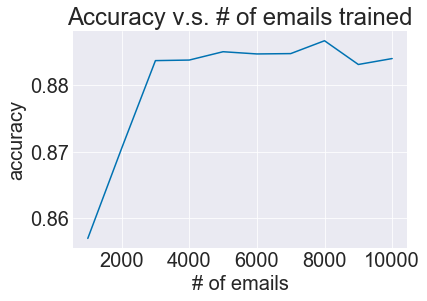

In [277]:
y = accuracies
plt.plot(x,accuracies)
plt.title('Accuracy v.s. # of emails trained')
plt.xlabel('# of emails')
plt.ylabel('accuracy')
plt.show()

- From the graph, we can know that in general, the more emails trained, the higher the accuracy.
- However, once the number of email trained reaches certain value (in this case, 3000-ish emails), the accuracy then remains almost stable as the #of emails further increases.
- That being said, more samples in the training set does not always bring higher accuracy; once the samples are sufficient, reliable accuracy can then be obtained.
- This conclusion may guide us to choose training set that are not too large but have enough/sufficient samples to generate reliable predictions.

### 3. Distance metrics
- Compare KNN performance with the $L^2$ and $L^1$ distance metrics

In [236]:
num_test = 500
classifier_l1 = KNN(num_classes=2)
classifier_l1.train(train_x, train_y)
test_y_pred_l1 = classifier_l1.predict_L1(test_x[:num_test], 1)

In [237]:
acc_l1 = classifier_l1.accuracy(test_y[:num_test], test_y_pred_l1)
print(f'KNN accuracy using L1 distance metric: {acc_l1 * 100}%')

KNN accuracy using L1 distance metric: 90.60000000000001%


- I found that when using L1 distance metric the accuracy (90.6%) is slightly smaller than when using L2 distance metric (91.8%)
- Hence, using L2 is relatively more accurate than using L1, but the difference in this case is subtle
- Given that, using L1 here may help reduce some computation burden while producing satisfactory results.

### 4. K-Fold Cross-Validation